# 第三章實訓

***本章節3.2無提供數據,故直接跳實訓,參考前面頁數的做法***

## 實訓一 分析1996~2015年人口數據特徵間的關係

- 需求說明
>
>人口數據總共有6個特徵,分別為年末總人口.男性人口.女性人口.城鎮人口.鄉村人口及年份
>
>查看各個特徵隨著時間推移發生的變化狀況可以分析出來男女人口比例.城鄉人口變化的方向
>

- 實現步驟
  1. 使用numpy庫讀取人口數據
  2. 創建畫布,並添加子圖
  3. 在兩個子圖上分別繪製散點圖與折線圖
  4. 保存並顯示圖片
  5. 分析未來人口變化趨勢

In [2]:
#導入數據庫,魔法函數
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#設定中文顯示
plt.rcParams['font.sans-serif']='SimHei'
plt.rcParams['axes.unicode_minus']=False

In [4]:
#導入人口數據,並提取數據
data=np.load('./populations.npz')
feature_names=data['feature_names']
values=data['data']
values=np.flip(values,axis=0) #翻轉數組
print(feature_names)
print(values)

['时间' '年末总人口(万人)' '男性人口(万人)' '女性人口(万人)' '城镇人口(万人)' '乡村人口(万人)']
[[nan nan nan nan nan nan]
 [nan nan nan nan nan nan]
 ['1996年' 122389.0 62200.0 60189.0 37304.0 85085.0]
 ['1997年' 123626.0 63131.0 60495.0 39449.0 84177.0]
 ['1998年' 124761.0 63940.0 60821.0 41608.0 83153.0]
 ['1999年' 125786.0 64692.0 61094.0 43748.0 82038.0]
 ['2000年' 126743.0 65437.0 61306.0 45906.0 80837.0]
 ['2001年' 127627.0 65672.0 61955.0 48064.0 79563.0]
 ['2002年' 128453.0 66115.0 62338.0 50212.0 78241.0]
 ['2003年' 129227.0 66556.0 62671.0 52376.0 76851.0]
 ['2004年' 129988.0 66976.0 63012.0 54283.0 75705.0]
 ['2005年' 130756.0 67375.0 63381.0 56212.0 74544.0]
 ['2006年' 131448.0 67728.0 63720.0 58288.0 73160.0]
 ['2007年' 132129.0 68048.0 64081.0 60633.0 71496.0]
 ['2008年' 132802.0 68357.0 64445.0 62403.0 70399.0]
 ['2009年' 133450.0 68647.0 64803.0 64512.0 68938.0]
 ['2010年' 134091.0 68748.0 65343.0 66978.0 67113.0]
 ['2011年' 134735.0 69068.0 65667.0 69079.0 65656.0]
 ['2012年' 135404.0 69395.0 66009.0 71182.0 64222.0]

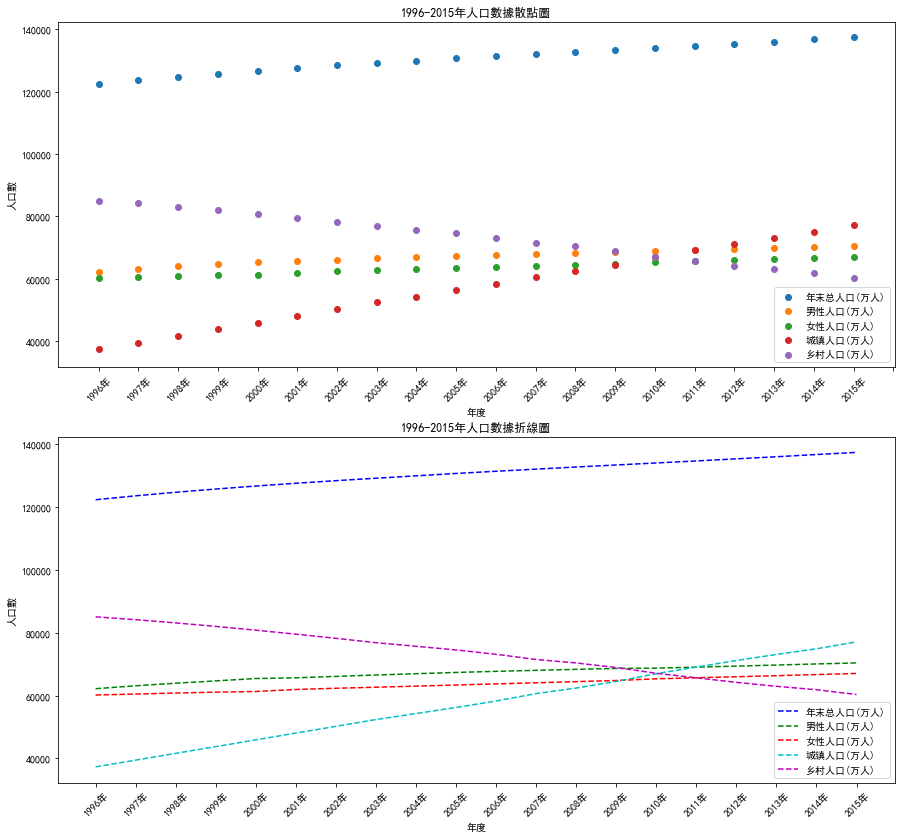

In [6]:

p1=plt.figure(figsize=(15,14))
ax1=p1.add_subplot(2,1,1) #第一幅子圖
plt.title('1996-2015年人口數據散點圖')
plt.xlabel('年度')
plt.ylabel('人口數')
plt.xticks(range(0,21),values[range(2,22,1),0],rotation=45)
plt.scatter(values[2:22,0],values[2:22,1])
plt.scatter(values[2:22,0],values[2:22,2])
plt.scatter(values[2:22,0],values[2:22,3])
plt.scatter(values[2:22,0],values[2:22,4])
plt.scatter(values[2:22,0],values[2:22,5])
plt.legend(['年末总人口(万人)','男性人口(万人)','女性人口(万人)','城镇人口(万人)','乡村人口(万人)'])
ax2=p1.add_subplot(2,1,2) #第二幅子圖
plt.title('1996-2015年人口數據折線圖')
plt.xlabel('年度')
plt.ylabel('人口數')
plt.xticks(range(0,21),values[range(2,22,1),0],rotation=45)
plt.plot(values[2:22,0],values[2:22,1],color='b',linestyle='--')
plt.plot(values[2:22,0],values[2:22,2],color='g',linestyle='--')
plt.plot(values[2:22,0],values[2:22,3],color='r',linestyle='--')
plt.plot(values[2:22,0],values[2:22,4],color='c',linestyle='--')
plt.plot(values[2:22,0],values[2:22,5],color='m',linestyle='--')
plt.legend(['年末总人口(万人)','男性人口(万人)','女性人口(万人)','城镇人口(万人)','乡村人口(万人)'])
p1.savefig('./populations_sp.png')
plt.show()

## 分析未來趨勢

- 總人口呈現平緩上升趨勢,所以在未來應該會持續上升
- 男性與女性人口持續上升,幾乎維持相同比例(略接近),
  所以男女比例不會改變太多,但男性與女性人口未來也會逐漸上升
- 城鎮與鄉鎮人口交叉,城鎮人口在交叉後上升陡峭,並高於鄉村人口
  所以未來城鄉差距將會持續拉大,城鎮人口未來會持續增加,
  而鄉村人口將會持續減少,代表鄉村人口逐漸外移到城鎮

## 實訓二 分析1996~2015人口數據各個特徵的分布與分散狀況

- 需求說明
>
>通過繪製個年份男女人口數目及城鄉人口數目的直方圖,
>
>男女人口比例及城鄉人口的比例圓餅圖可發現結構變化
>
>而繪製每個特徵的箱線圖可發現不同特徵增長或減少的速率是否變得緩慢
>

- 實現步驟
  1. 創建3幅畫布並添加對應數目的子圖
  2. 在每一幅子圖上繪製對應的圖形
  3. 保存與顯示圖形
  4. 根據圖形分析人口結構變化情況與變化速率的增減狀況

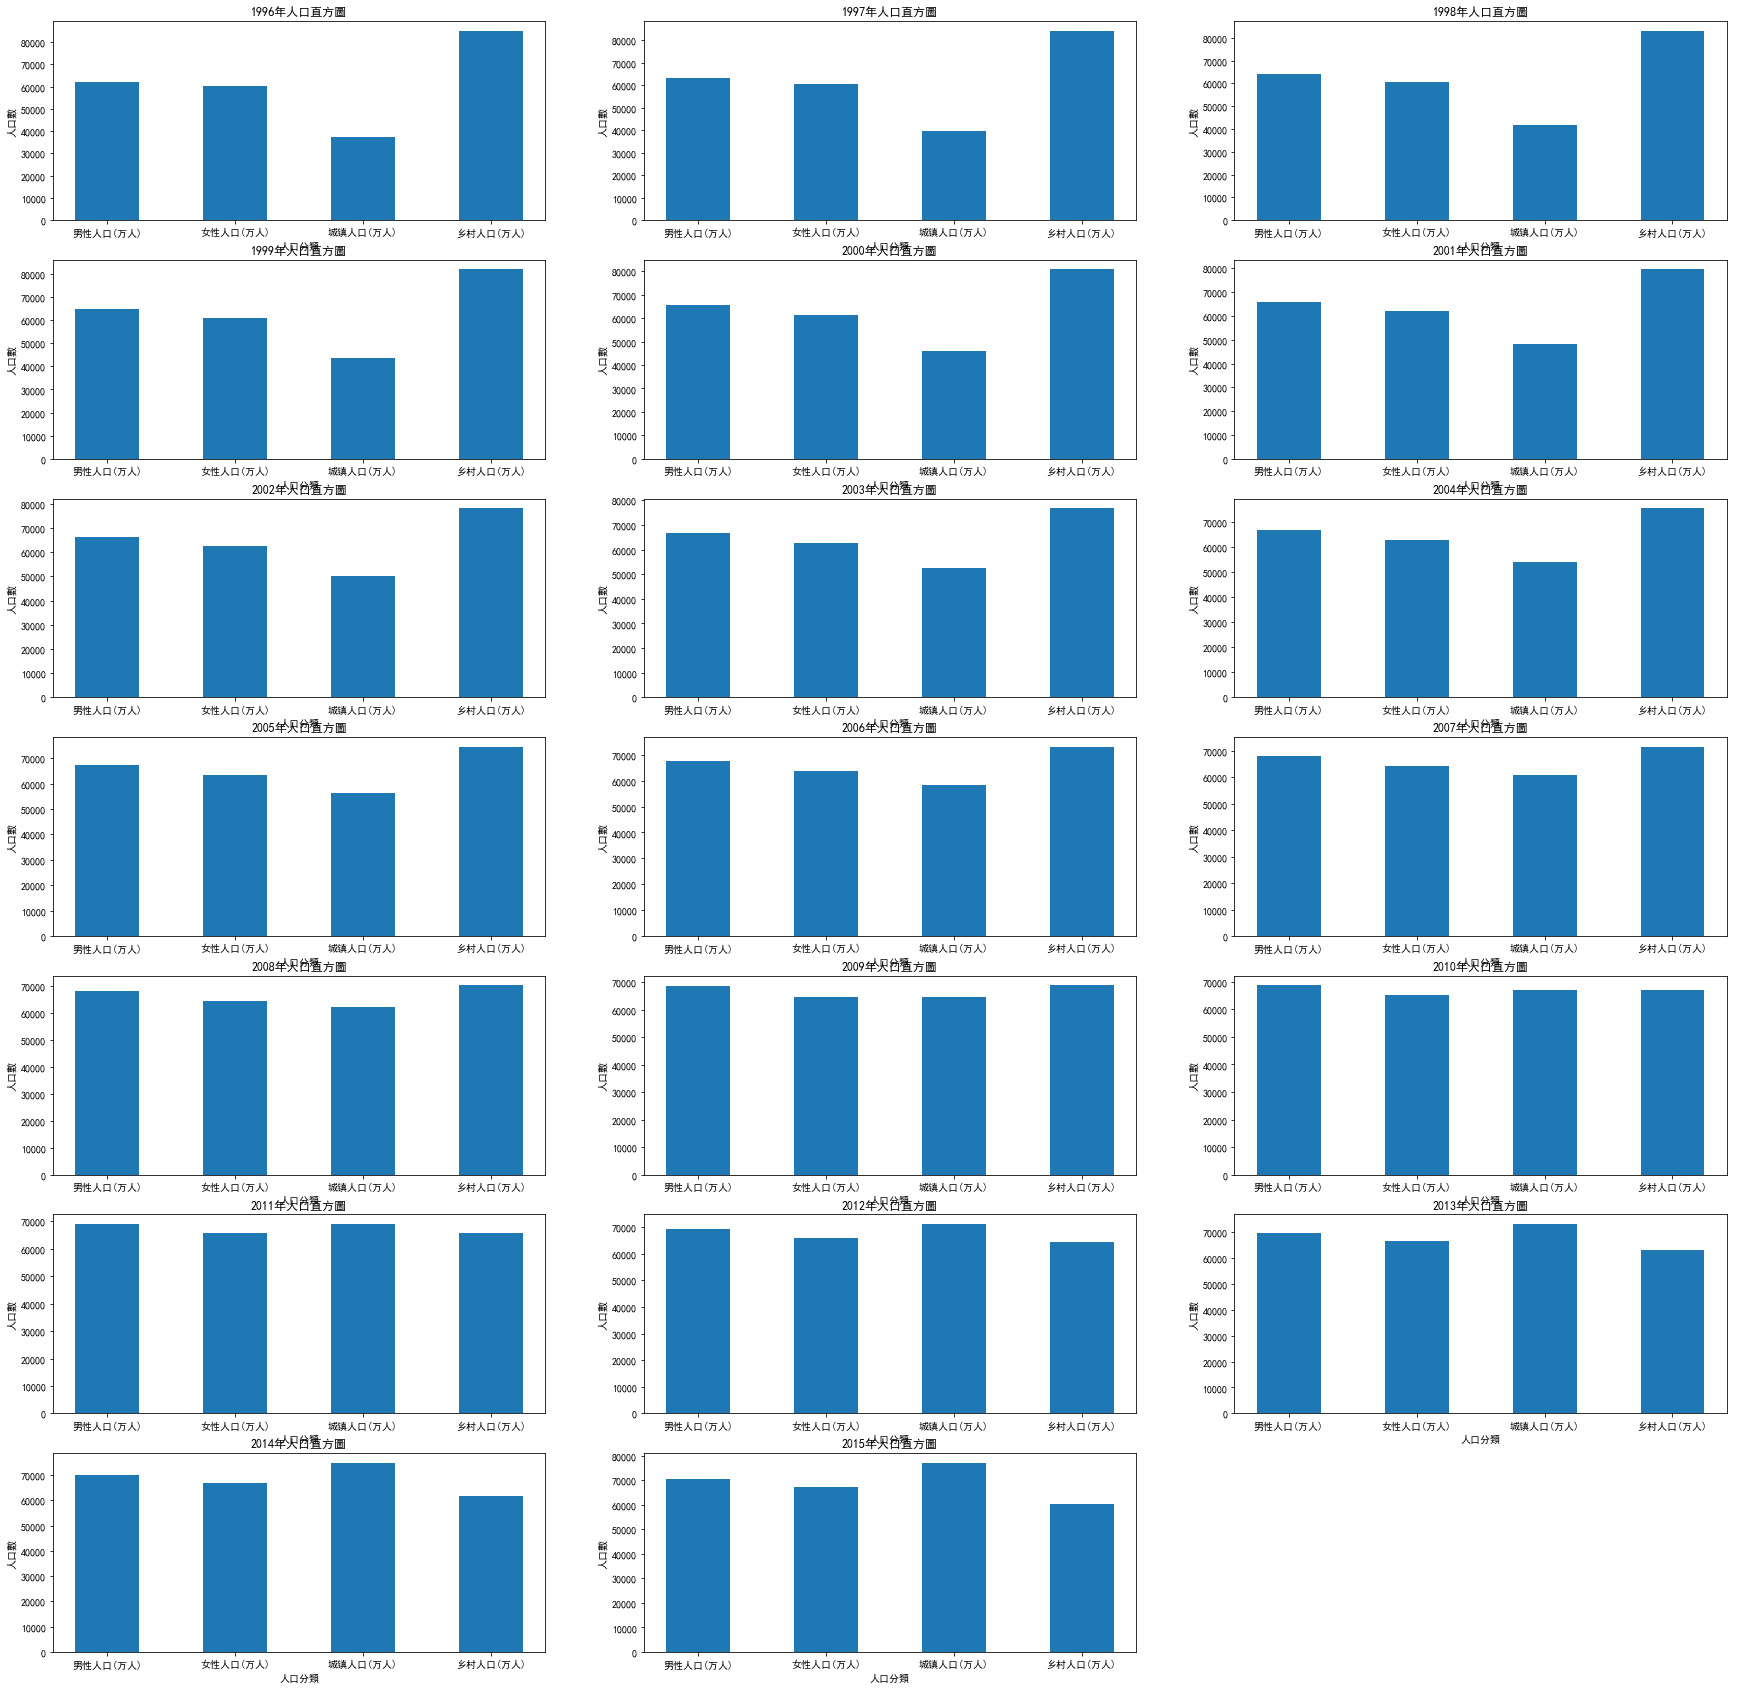

In [7]:
#增加畫布
p1=plt.figure(figsize=(30,30))
#繪製直方圖
for i in range(1,21):
    p1.add_subplot(7,3,i)
    plt.bar(range(4),values[i+1,2:6],width=0.5)
    plt.title('%s人口直方圖' % (values[i+1,0]))
    plt.xlabel('人口分類')
    plt.ylabel('人口數')
    label=['男性人口(万人)','女性人口(万人)','城镇人口(万人)','乡村人口(万人)']
    plt.xticks(range(4),label)
else:
    p1.savefig('./population_bar.png')
    plt.show()

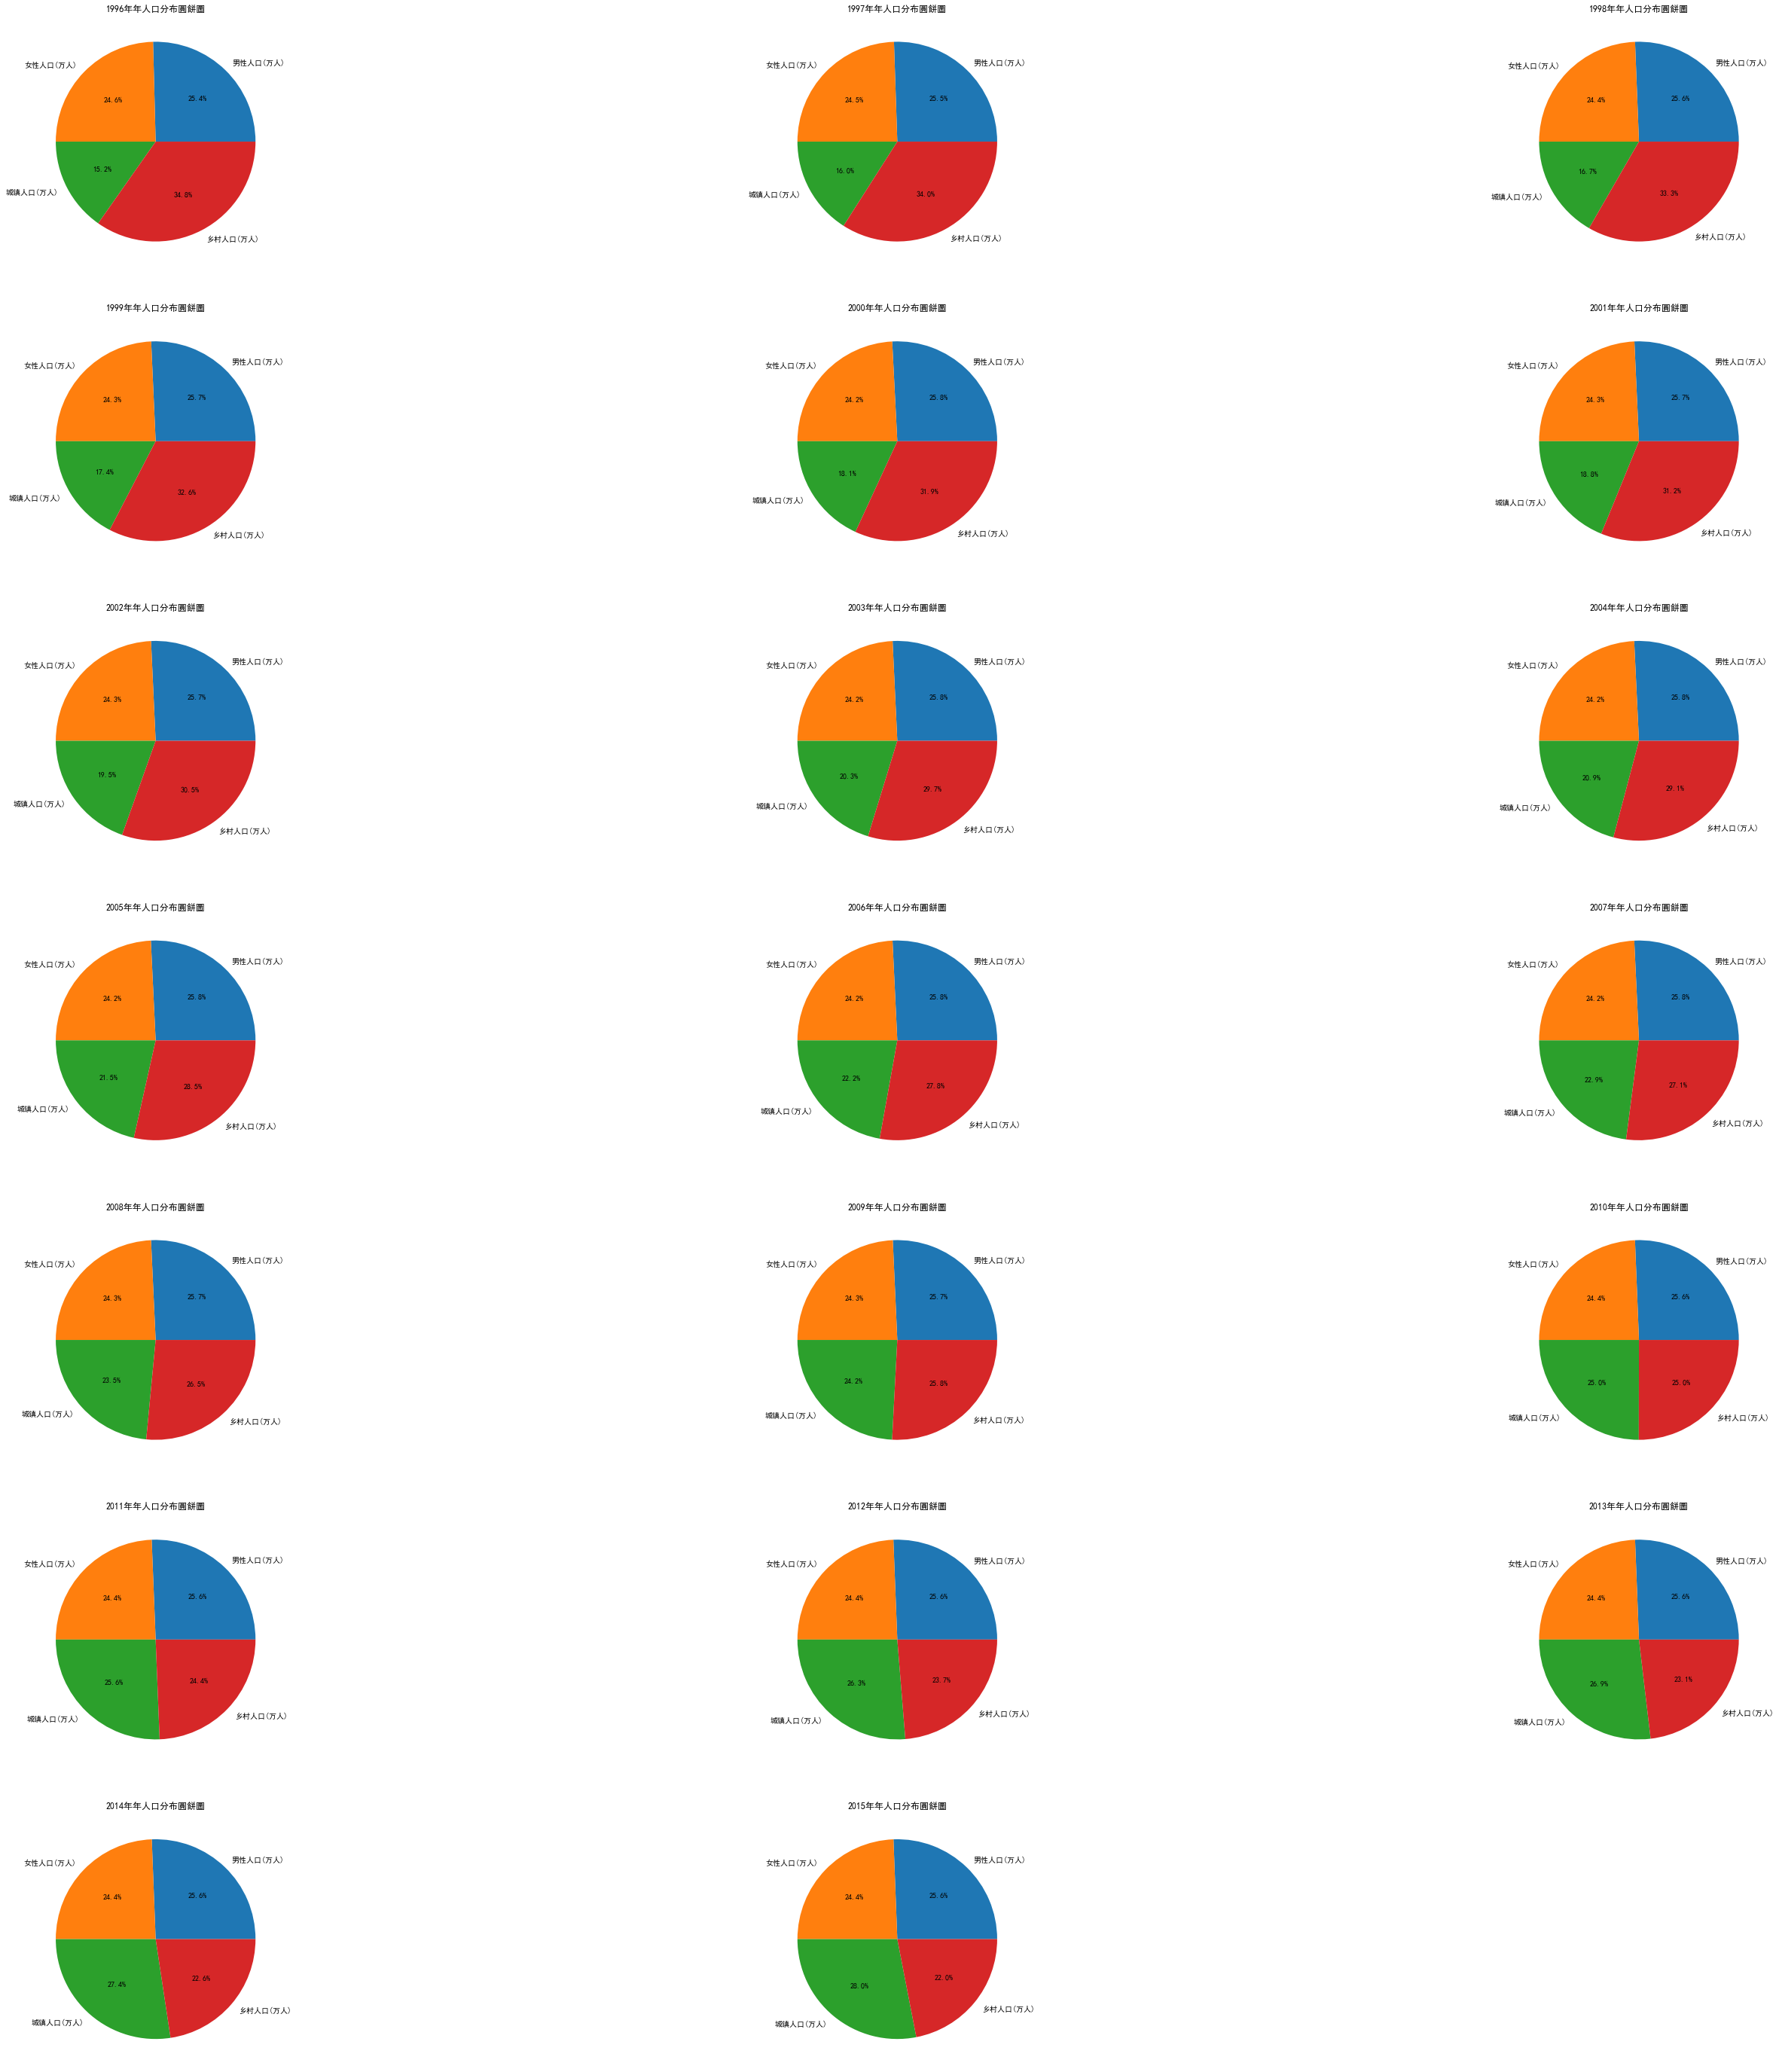

In [8]:
#增加畫布
p2=plt.figure(figsize=(50,50))
#繪製餅圖
for i in range(1,21):
    p2.add_subplot(7,3,i)
    label=['男性人口(万人)','女性人口(万人)','城镇人口(万人)','乡村人口(万人)']
    plt.pie(values[i+1,2:6],labels=label,autopct='%1.1f%%')
    plt.title('%s年人口分布圓餅圖' % (values[i+1,0]))
else:
    p2.savefig('./populations_pie.png')
    plt.show()

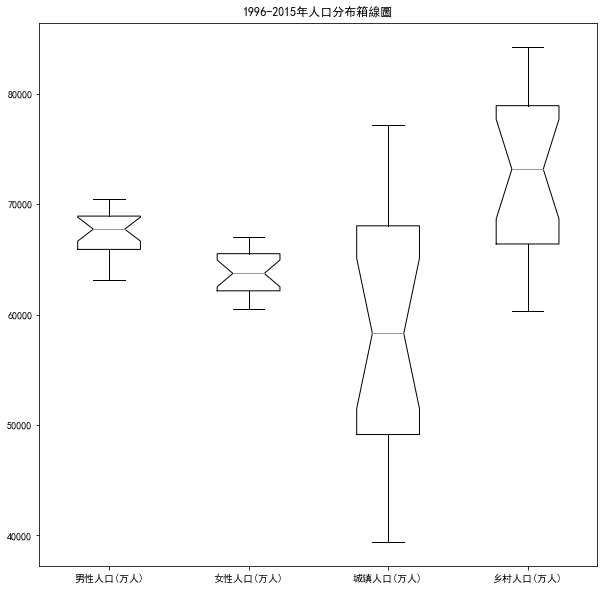

In [9]:
#增加畫布
p3=plt.figure(figsize=(10,10))
#新增標籤列表
label=['男性人口(万人)','女性人口(万人)','城镇人口(万人)','乡村人口(万人)']
#新增資料列表
populations=(list(values[3:,2]),list(values[3:,3]),list(values[3:,4]),list(values[3:,5]))
#繪製箱線圖
plt.boxplot(populations,notch=True,labels=label,meanline=True)
plt.title('1996-2015年人口分布箱線圖')
plt.savefig('./populations_boxplot.png')
plt.show()

## 分析結構變化與變化速率
>
>由直條圖發現男女人口變化不大,由圓餅圖發現男女人口結構變化並不大
>
>由直條圖發現城鎮人口在2006年之後急速增加,鄉村人口在2011年之後減少
>
>由圓餅圖發現城鎮人口與鄉村人口的比例在2003年時開始變化較大
>
>城鎮人口比例開始增加,鄉村人口比例開始減少
>
>觀察箱線圖,男性與女性人口的變化速率緩慢
>
>而城鎮人口與鄉村人口變化速率較快

## 整體趨勢

>
>中國在1996到2015年間男女人口結構變化不大
>
>而城鄉人口結構在2003年後開始明顯改變,鄉村人口開始外移到城鎮
>
>而中國在1996年到2015年間總人口緩慢上升
>
>男女人口皆同樣的緩慢上升,結構無明顯變化
>
>中國在2015年後人口增加趨勢應為平緩
>
>而城鄉人口結構應會持續改變,城鎮人口比例將持續上升